In [1]:
# What version of Python do you have?
import sys
import os
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import re
import mne
import pathlib
import openpyxl
from datetime import datetime
import pytz
import random
import os
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix
from PIL import Image
%matplotlib inline

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Init Plugin
Init Graph Optimizer
Init Kernel
Tensor Flow Version: 2.5.0
Keras Version: 2.5.0

Python 3.9.7 (default, Sep 16 2021, 23:53:23) 
[Clang 12.0.0 ]
Pandas 1.3.1
Scikit-Learn 0.24.2
GPU is available


In [32]:
import tensorflow as tf
print('tensorflow version:',tf.__version__)
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
 # Available options are 'cpu', 'gpu', and 'any'.
tf.config.run_functions_eagerly(False)
print(tf.executing_eagerly())

tensorflow version: 2.5.0
False


In [58]:
resnet152_input_shape = (224, 224)
inceptionV3_input_shape = (299, 299)
batch_size = 1
print(os.getcwd())
test_df = pd.read_csv("csv/tester.csv")
labels = test_df['class'].unique()

/Users/niklashjort/Desktop/Notes/Speciale/projects/MIT_Model


In [5]:
model = tf.keras.models.load_model("h5_files/ten_epoch_onlytrain_model.h5", compile=True)

In [6]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [13]:
generator = ImageDataGenerator(
  rescale=1./255,
)

In [43]:
inc_test_gen = generator.flow_from_directory("test_images", batch_size=batch_size, target_size=inceptionV3_input_shape, classes=list(labels), shuffle=False)

Found 163 images belonging to 4 classes.


In [44]:
res_test_gen = generator.flow_from_directory("test_images", batch_size=batch_size, target_size=resnet152_input_shape, classes=list(labels), shuffle=False)

Found 163 images belonging to 4 classes.


In [45]:
def generator_test():
     while True:
        X1i = inc_test_gen.next()
        X2i = res_test_gen.next()
        yield [X1i[0], X2i[0]], X1i[1]

In [17]:
y_true = inc_test_gen.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [59]:
number_of_steps = inc_test_gen.samples // batch_size
number_of_steps

163

In [30]:
model.call = tf.function(model.call)

In [37]:
graph = None

def load_model():
    # global variables
    global loaded_model
    global graph

    loaded_model = tf.keras.models.load_model('h5_files/ten_epoch_onlytrain_model.h5')
    graph = tf.compat.v1.get_default_graph()

load_model()

2021-10-26 12:11:34.453868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-26 12:11:37.000004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-26 12:11:38.928551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-26 12:11:45.514037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-26 12:11:48.498048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-26 12:11:50.562528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-10-26 12:11:55.888100: I tensorflow/core/grappler/optimizers/cust

In [60]:

with graph.as_default():
    y_pred = loaded_model.predict(generator_test(), steps=number_of_steps)

In [61]:
y_pred_max = y_pred.argmax(axis=-1)

In [56]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix

In [62]:
clf_report = classification_report(y_true=y_true, y_pred=y_pred_max, target_names=labels)

/usr/local/Caskroom/miniforge/base/envs/speciale_01_01/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Caskroom/miniforge/base/envs/speciale_01_01/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Caskroom/miniforge/base/envs/speciale_01_01/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [63]:
print(clf_report)

              precision    recall  f1-score   support

  Interictal       0.25      1.00      0.40        41
Preictal_One       0.00      0.00      0.00        41
Preictal_Two       0.00      0.00      0.00        41
     Seizure       0.00      0.00      0.00        40

    accuracy                           0.25       163
   macro avg       0.06      0.25      0.10       163
weighted avg       0.06      0.25      0.10       163



In [64]:
confusion_matrix = confusion_matrix(y_true=y_true, y_pred=list(y_pred_max))

confusion_matrix

array([[41,  0,  0,  0],
       [41,  0,  0,  0],
       [41,  0,  0,  0],
       [40,  0,  0,  0]])

In [65]:
import matplotlib

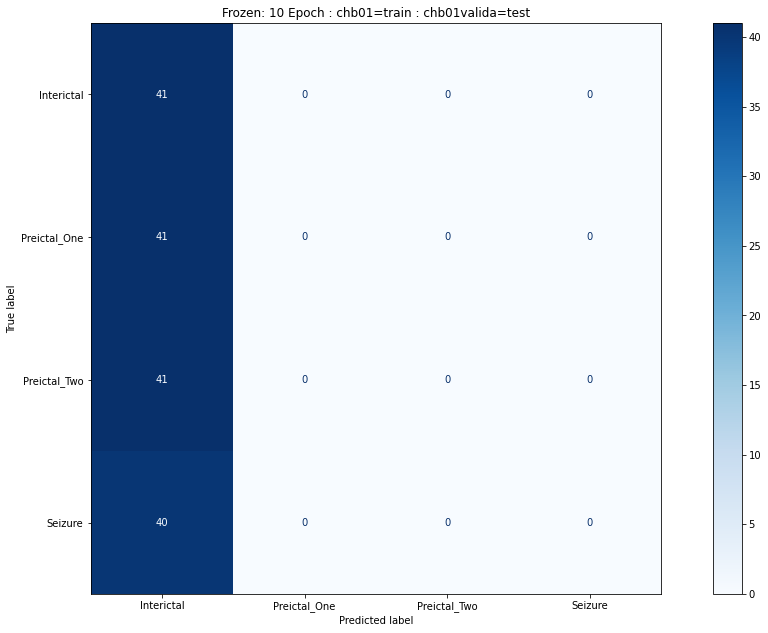

In [68]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels).plot(cmap='Blues')
plt.title("Frozen: 10 Epoch : chb01=train : chb01valida=test")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.savefig("hi2.png")